In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(style="white")

In [68]:
import base64

import chess.engine
import chess.pgn
import chess.svg
from IPython.core.display import display_svg, display_html, HTML
from stockfish import Stockfish

_html_template='<img width="{}" src="data:image/svg+xml;base64,{}" >'

def svg_to_fixed_width_html_image(svg, width="100%"):
    text = _html_template.format(width, base64.b64encode(svg))
    return HTML(text)

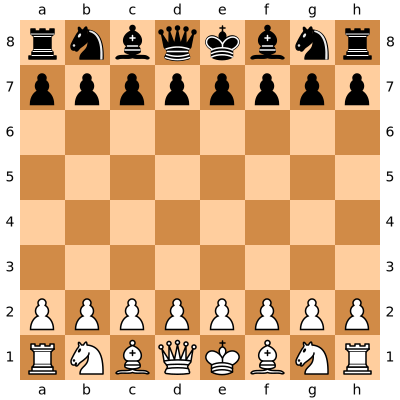

Score : 75

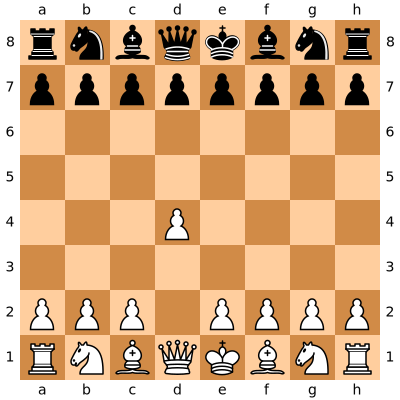

Score : 6

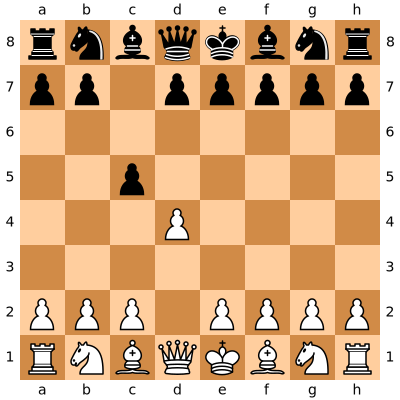

Score : 140

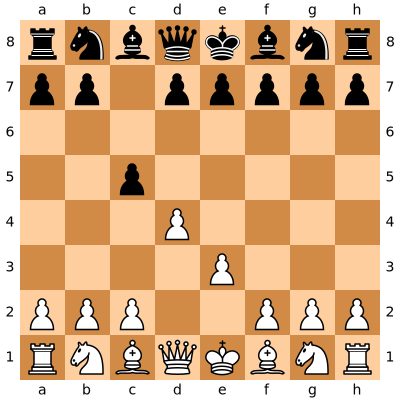

Score : 3

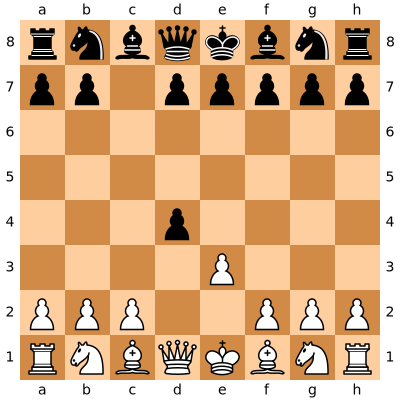

Score : 83

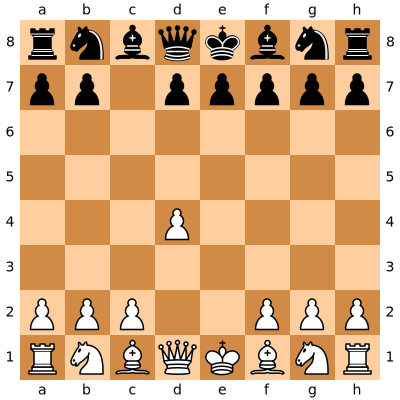

Score : -39

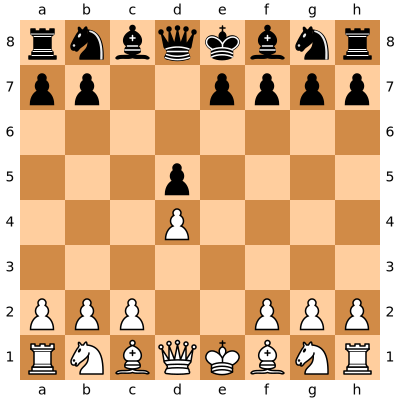

Score : 76

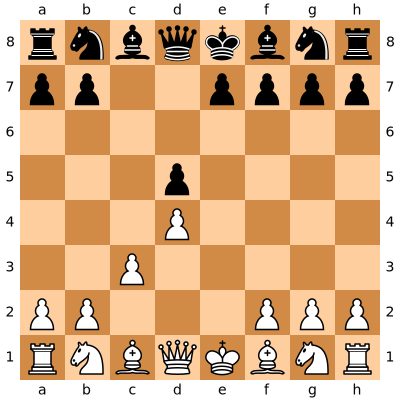

Score : 24

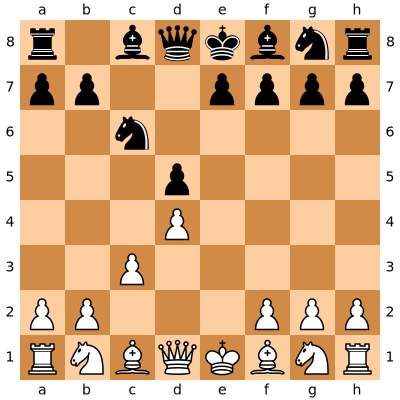

Score : 61

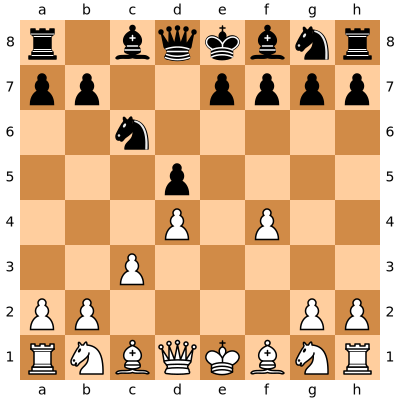

Score : 84

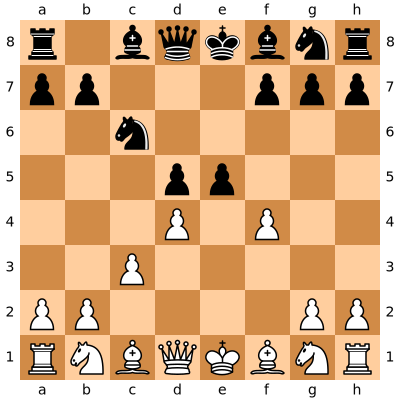

Score : 53

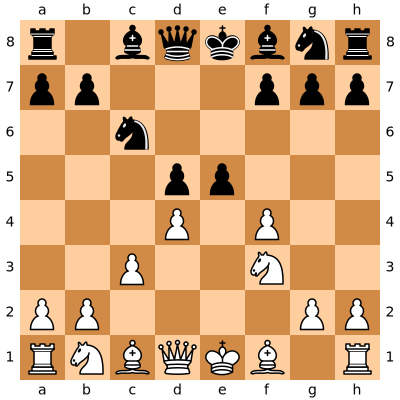

Score : 130

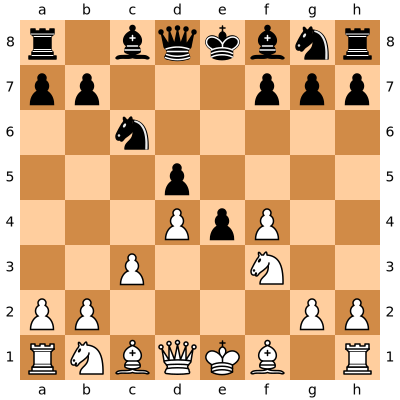

Score : -84

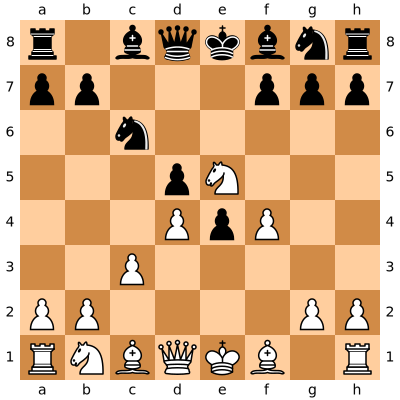

Score : 151

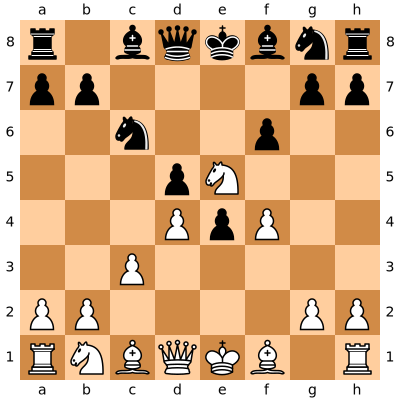

Score : 256

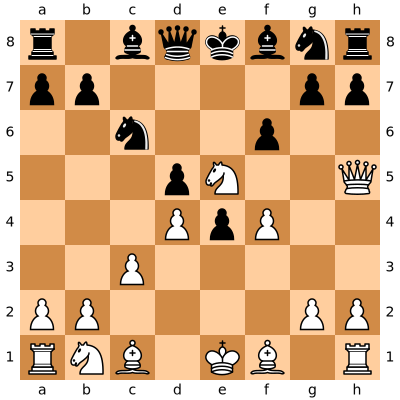

Score : -223

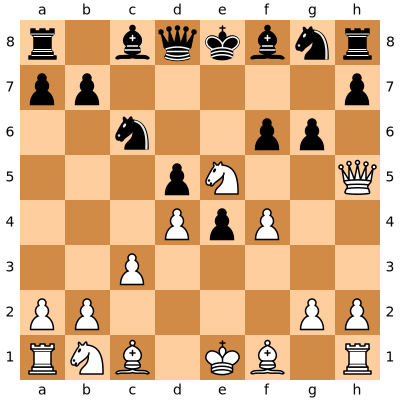

Score : 258

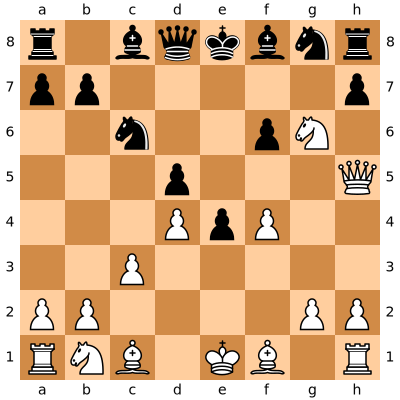

Score : -205

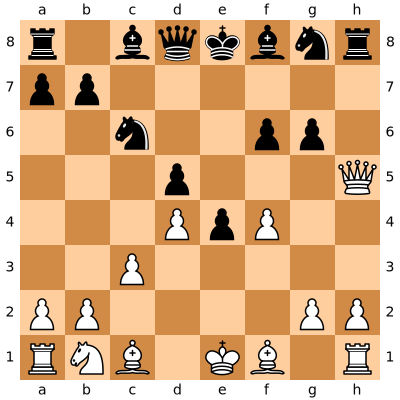

Score : 237

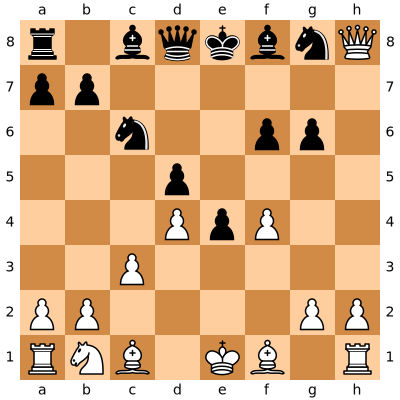

Score : -190

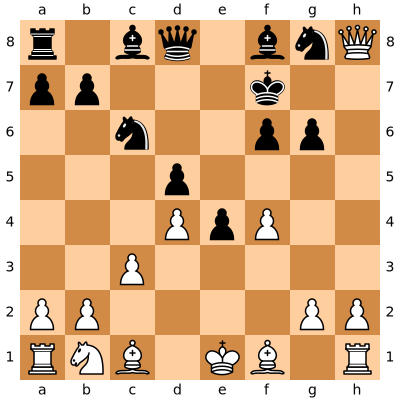

Score : 258

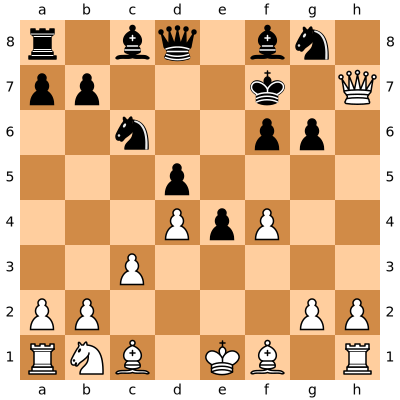

Score : -220

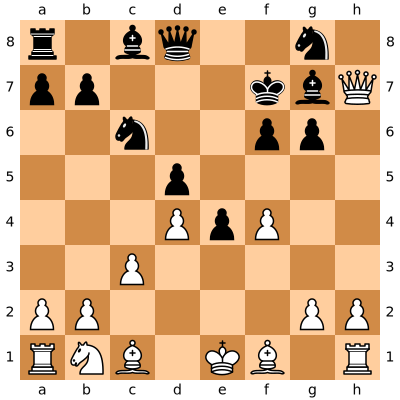

Score : 253

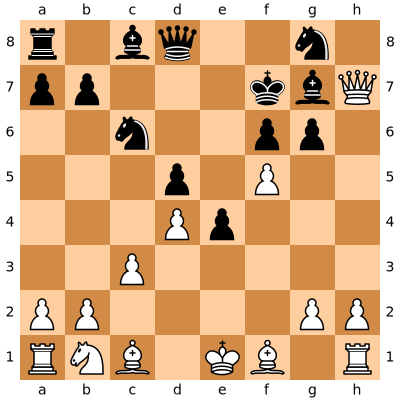

Score : -116

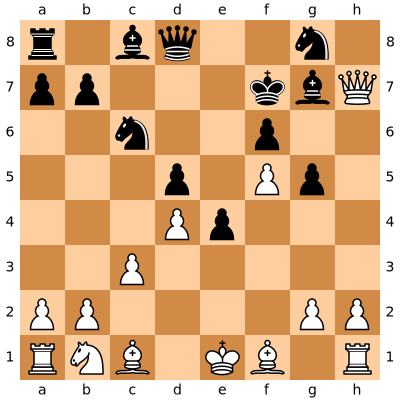

Score : 500

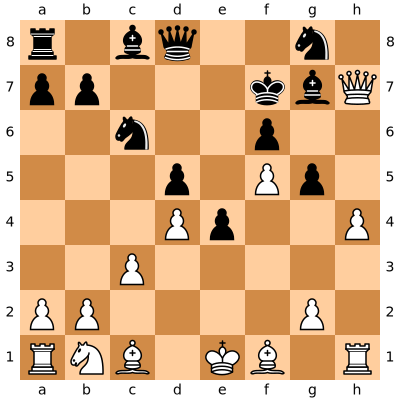

Score : -312

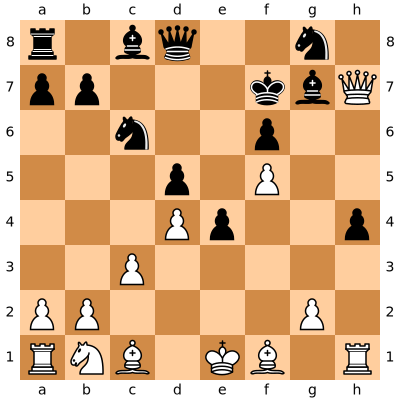

Score : 530

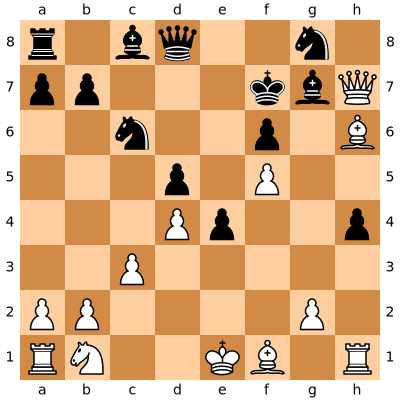

Score : 672

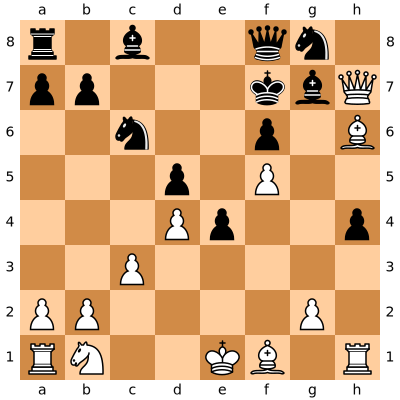

Score : 831

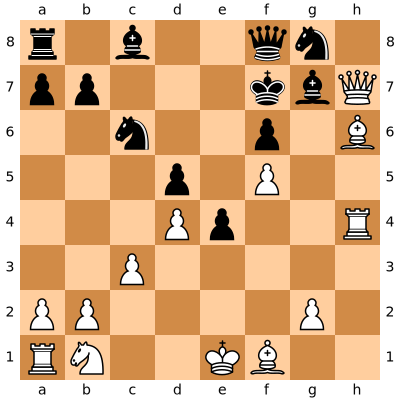

Score : -22

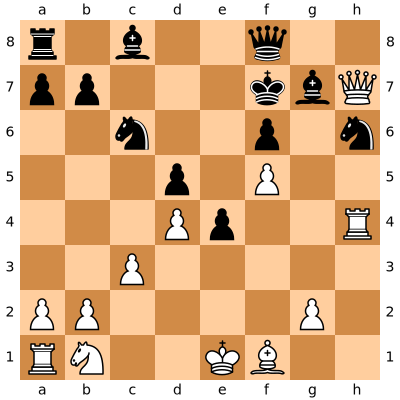

Score : 71

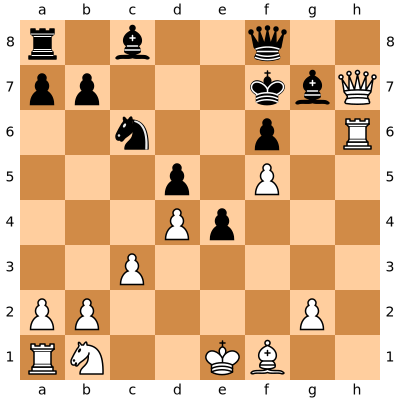

Score : -85

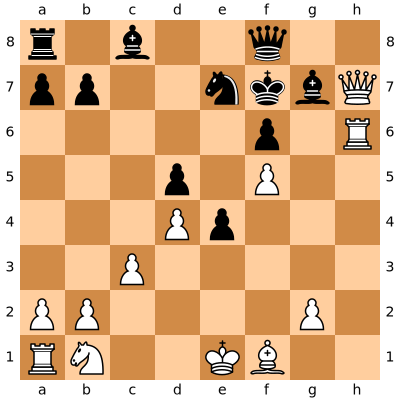

Score : 466

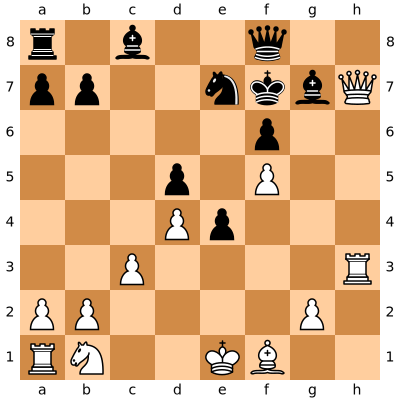

Score : -84

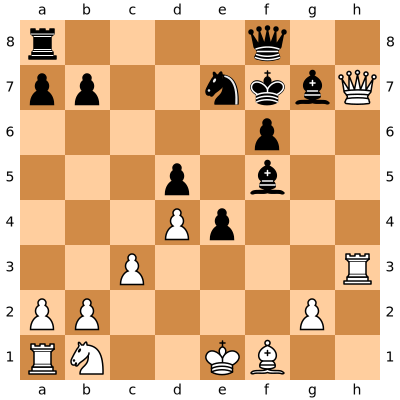

Score : 152

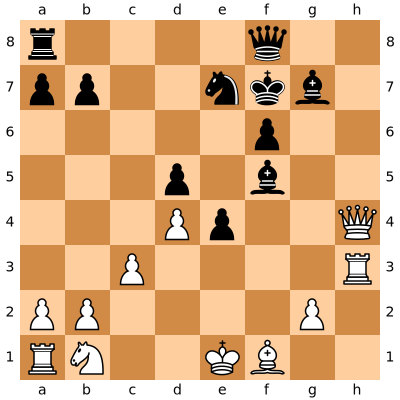

Score : 188

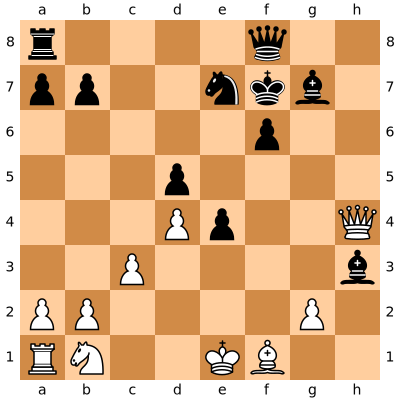

Score : -172

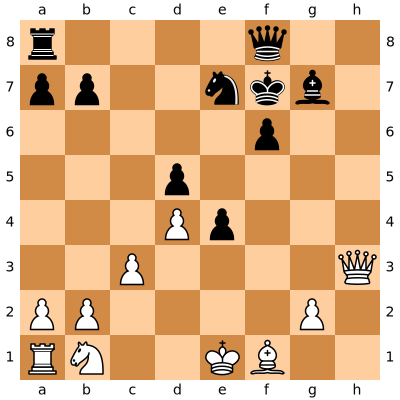

Score : 211

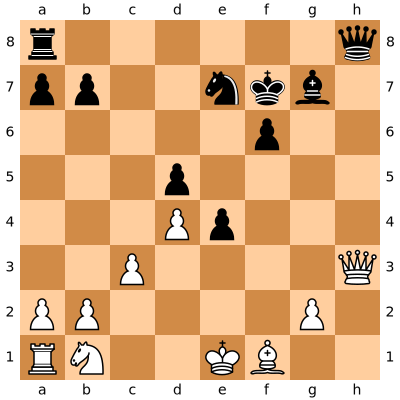

Score : -175

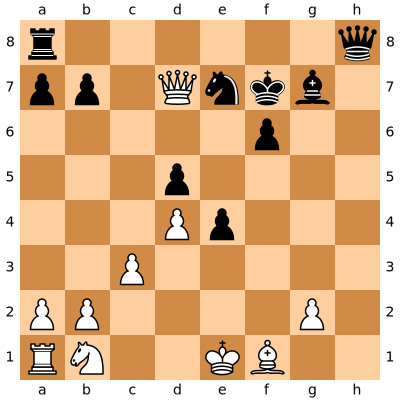

Score : 524

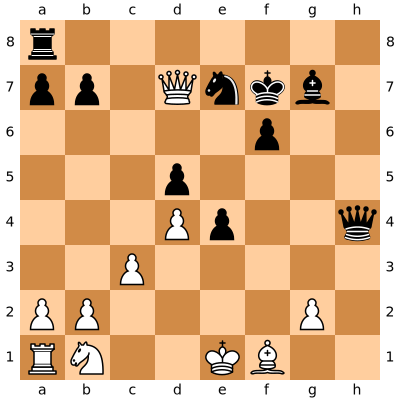

Score : -531

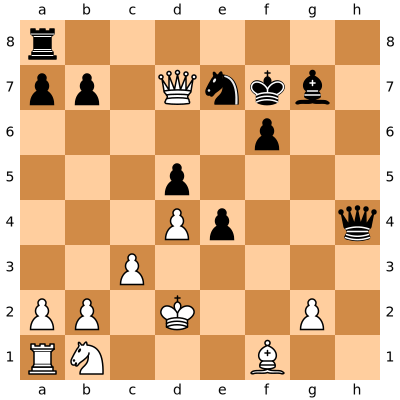

Score : 1018

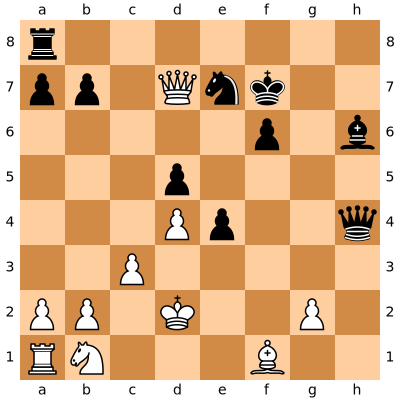

Score : -778

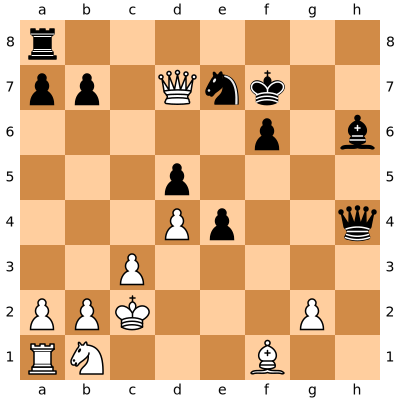

Score : 809

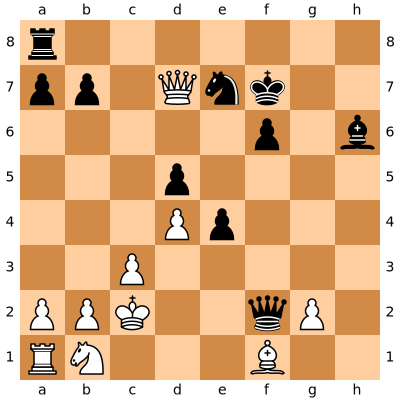

Score : -807

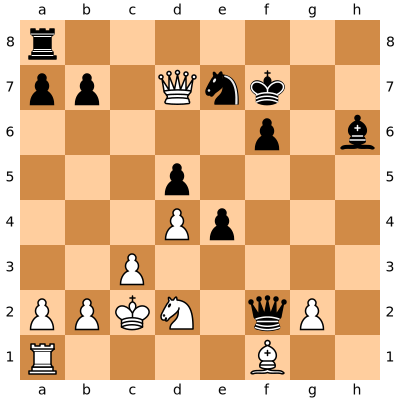

Score : 812

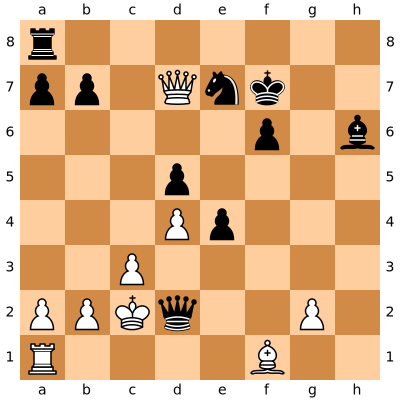

Score : -481

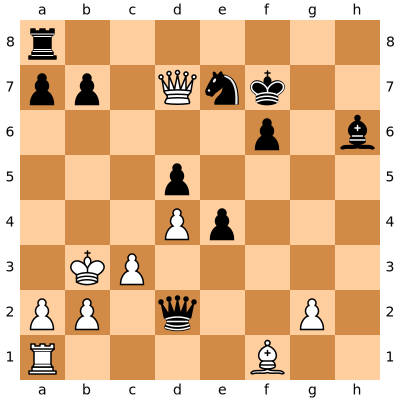

Score : 526

Finished analyzing game


In [30]:
board = chess.Board()
pgn = open('/Users/mayanktiwari/Developer/Workspaces/KaggleWorkspace/ChessELOPrediction/ELO/data/game1.pgn')
game = chess.pgn.read_game(pgn)

engine = chess.engine.SimpleEngine.popen_uci("stockfish")

prev_eval = 0
diff = 0
output_data_string = ''

for move in game.mainline_moves():
    # print("=" * 50)
    # print(board)
    board_svg = chess.svg.board(board)
#     svg_to_fixed_width_html_image(board_svg)
    display_svg(board_svg, raw=True)
    
#     limit = chess.engine.Limit(time=0.100)
    limit = chess.engine.Limit(depth=20)
    result = engine.analyse(board, limit)
    # result = engine.play(board, chess.engine.Limit(time=0.100))

    evaluation = result.score.relative.cp
    display_html(f'<p> <b>Score</b>: {evaluation}</p>', raw=True)
    # print("=" * 50)

    if board.turn:
        if prev_eval - evaluation > 0.3:
            evaluation_label = "B"  # badmove
        else:
            evaluation_label = "G"  # goodmove

    if not board.turn:
        evaluation *= -1
        if evaluation - prev_eval > 0.3:
            evaluation_label = "B"  # badmove
        else:
            evaluation_label = "G"  # goodmove

    prev_eval = evaluation

    board.push(move)
    # out_board = convertToBB(board)
    # output_data_string = output_data_string + out_board + ',' + evaluation_label + '\n'

# print(output_data_string)
print("Finished analyzing game")

engine.quit()


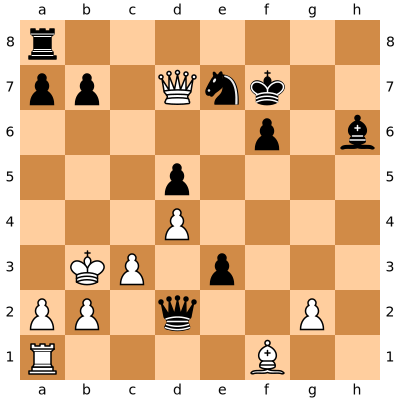

In [38]:
testB = chess.Board('r7/pp1Qnk2/5p1b/3p4/3P4/1KP1p3/PP1q2P1/R4B2 w - - 0 25')
testB

In [54]:
engine = chess.engine.SimpleEngine.popen_uci("stockfish")
test_fen = 'r1bq2n1/pp3kbQ/2n2p2/3p1P2/3Pp2p/2P5/PP4P1/RNB1KB1R w KQ - 0 14'
# test_fen = 'r1bq2n1/pp3kbQ/2n2p1B/3p1P2/3Pp2p/2P5/PP4P1/RN2KB1R b KQ - 1 14'

# with pd.option_context("display.max_rows", None, "display.max_columns", None):
with engine.analysis(chess.Board(test_fen)) as analysis:
    for index, info in enumerate(analysis):
#         print(info.get("score"), info.get("pv"))
#         print(f'{index} => {info.get("score")}, PV: {info.get("pv")}')
        print(f'{index} => {info.get("score")}')

        # Arbitrary stop condition.
        if info.get("seldepth", 0) > 30:
            break
engine.quit()

0 => +814
1 => +562
2 => +487
3 => +522
4 => +684
5 => +728
6 => +427
7 => +438
8 => +487
9 => +552
10 => +616
11 => +483
12 => +478
13 => +470
14 => +484
15 => +490
16 => +494
17 => +499


In [57]:
engine = chess.engine.SimpleEngine.popen_uci("stockfish")
# test_fen = 'r1bq2n1/pp3kbQ/2n2p2/3p1P2/3Pp2p/2P5/PP4P1/RNB1KB1R w KQ - 0 14'
test_fen = 'r1bq2n1/pp3kbQ/2n2p1B/3p1P2/3Pp2p/2P5/PP4P1/RN2KB1R b KQ - 1 14'
test_board = chess.Board(test_fen)

if test_board.turn: 
    print ('White to move')
else: 
    print ('black to move')
    
# with pd.option_context("display.max_rows", None, "display.max_columns", None):
with engine.analysis(test_board) as analysis:
    for index, info in enumerate(analysis):
#         print(info.get("score"), info.get("pv"))
#         print(f'{index} => {info.get("score")}, PV: {info.get("pv")}')
        print(f'{index} => {info.get("score")}')
        # print (str(board.san(el)), 'eval = ', round(handler.info["score"][1].cp/100.0,2))
              
        # Arbitrary stop condition.
        if info.get("seldepth", 0) > 30:
            break
engine.quit()

0 => +64
1 => +355
2 => +419
3 => +760
4 => -142
5 => +119
6 => +165
7 => +208
8 => +373
9 => +402
10 => +413
11 => +505
12 => +566
13 => +614
14 => +562
15 => +608
16 => +637
17 => +611
18 => +696
19 => +687


In [59]:
stockfish = Stockfish()
# set position by FEN:
stockfish.set_fen_position("r7/pp1Qnk2/5p1b/3p4/3P4/1KP1p3/PP1q2P1/R4B2 w - -")

In [60]:
stockfish.get_best_move()

'd7b7'

In [61]:
print(stockfish.info)

info depth 2 seldepth 2 multipv 1 score cp -179 nodes 106 nps 106000 tbhits 0 time 1 pv d7b7 e3e2 b7a8 e2e1q a1e1 d2e1 a8a7


In [62]:
stockfish.info

'info depth 2 seldepth 2 multipv 1 score cp -179 nodes 106 nps 106000 tbhits 0 time 1 pv d7b7 e3e2 b7a8 e2e1q a1e1 d2e1 a8a7'

In [66]:
stockfish.set_position('d7b7')

In [4]:
print(stockfish.info)

NameError: name 'stockfish' is not defined

In [13]:
import pandas as pd
# data = pd.read_csv("/Users/mayanktiwari/Developer/Workspaces/KaggleWorkspace/ChessELOPrediction/ELO/game_analysis.psv", sep="|")
data = pd.read_csv(
    "/Users/mayanktiwari/Developer/Workspaces/KaggleWorkspace/ChessELOPrediction/ELO/dump/game_analysis_12_03_2019_10_22_52.psv", 
    sep="|", low_memory=False
)

In [14]:
data.describe()

,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,2193.035385,769.131751,32.917028,33.431654,74.996486,20.695771
std,17014.907881,17058.130245,15.050064,15.037774,416.750273,410.841720
min,-157054.000000,-154670.000000,0.000000,0.000000,-2488.000000,-2549.740000
25%,-4518.000000,-6052.000000,23.000000,23.000000,-154.650000,-209.500000
50%,1697.000000,327.000000,31.000000,32.000000,79.140000,16.000000
75%,9194.000000,7684.000000,42.000000,42.000000,316.160000,253.340000
max,143289.000000,176463.000000,130.000000,131.000000,2424.790000,3155.090000


In [109]:
data = data.query('whiteELO != "?" and blackELO != "?"')
data.whiteELO = data.whiteELO.astype('int')
data.blackELO = data.blackELO.astype('int')

data.loc[data['event'].str.contains('Rated Blitz', na=False), 'event'] = 'Rated Blitz'
data.loc[data['event'].str.contains('Rated Bullet', na=False), 'event'] = 'Rated Bullet'
data.loc[data['event'].str.contains('Rated Classical', na=False), 'event'] = 'Rated Classical'
data.loc[data['event'].str.contains('Rated Rapid', na=False), 'event'] = 'Rated Rapid'
data.loc[data['event'].str.contains('Rated UltraBullet', na=False), 'event'] = 'Rated UltraBullet'
data.loc[data['event'].str.contains('Rated Correspondence', na=False), 'event'] = 'Rated Correspondence'


In [110]:
data['event'].value_counts()

Rated Blitz             4100
Rated Bullet            3175
Rated Rapid              947
Rated Classical          262
Rated UltraBullet         22
Rated Correspondence      17
Name: event, dtype: int64

In [120]:
data['termination'].value_counts()

Normal          5581
Time forfeit    2921
Abandoned         21
Name: termination, dtype: int64

In [83]:
data

,event,isDraw,hasBlackWon,opening,whiteELO,blackELO,timeControl,termination,totalWhiteScore,totalBlackScore,noWhiteMoves,noBlackMoves,whiteAvgScore,blackAvgScore
0,Rated Bullet game,False,True,Scandinavian Defense,1418,1390,60+0,Normal,-5112,6476,15,15,-340.80,431.73
1,Rated Bullet game,False,False,Torre Attack #2,2002,1988,60+0,Normal,22197,-22367,33,34,672.64,-657.85
2,Rated Bullet game,False,False,"English Opening: King's English Variation, Thr...",2096,2132,60+0,Normal,2244,-1124,18,19,124.67,-59.16
3,Rated Bullet game,False,False,English Opening: Anglo-Indian Defense,2079,2059,60+0,Normal,12049,-12040,25,26,481.96,-463.08
4,Rated Bullet game,False,True,Sicilian Defense: French Variation,1607,1666,60+0,Normal,-2945,4591,23,23,-128.04,199.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,Rated Bullet game,False,True,Réti Opening,1616,1579,60+0,Time forfeit,10778,-8692,35,35,307.94,-248.34
8521,Rated Bullet game,True,False,Van't Kruijs Opening,1790,1702,60+0,Time forfeit,-49660,36699,46,47,-1079.57,780.83
8522,Rated Bullet game,False,False,"King's Indian Defense: Normal Variation, King'...",2223,2295,60+0,Time forfeit,7887,-3407,48,49,164.31,-69.53
8523,Rated Bullet game,False,True,Scandinavian Defense,1060,916,60+0,Time forfeit,55484,-43661,34,34,1631.88,-1284.15


In [29]:
data.columns

Index(['event', 'isDraw', 'hasBlackWon', 'opening', 'whiteELO', 'blackELO',
       'timeControl', 'termination', 'totalWhiteScore', 'totalBlackScore',
       'noWhiteMoves', 'noBlackMoves', 'whiteAvgScore', 'blackAvgScore'],
      dtype='object')

In [42]:
data['blackELO'].corr(data['totalBlackScore'])
# noWhiteMoves	noBlackMoves	whiteAvgScore

0.03159194924297159

In [ ]:
dataWhite = data.query('hasBlackWon == False')

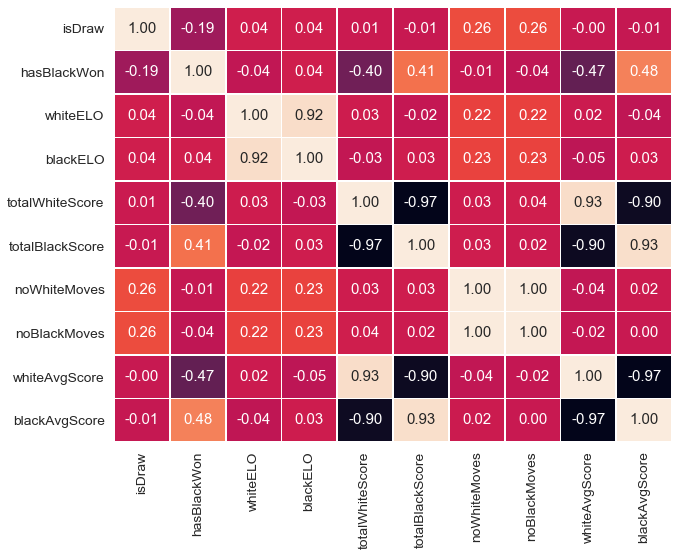

In [85]:
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.25)
sns.heatmap(
    data.corr(),
    cbar=False,
    linewidths=.8,
    annot=True,
#     square=True,
    fmt=".2f",
#     annot_kws={"size": 10}
);

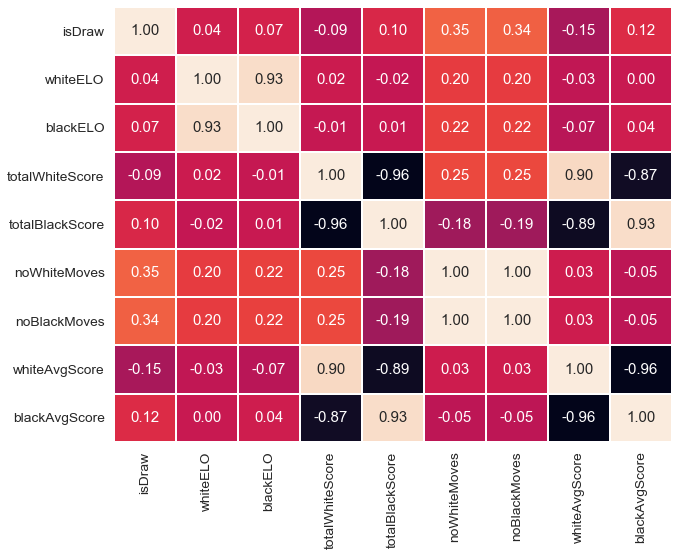

In [90]:
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.25)
sns.heatmap(
    data.query('hasBlackWon == False')[['isDraw','whiteELO', 'blackELO',
       'totalWhiteScore', 'totalBlackScore', 'noWhiteMoves', 'noBlackMoves', 'whiteAvgScore', 'blackAvgScore']].corr(),
    cbar=False,
    linewidths=.8,
    annot=True,
#     square=True,
    fmt=".2f",
#     annot_kws={"size": 10}
);

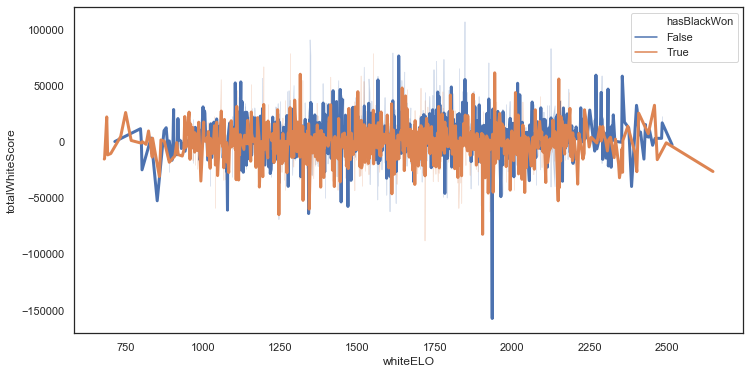

In [123]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    x="whiteELO", y="totalWhiteScore", 
    hue="hasBlackWon", lw=3, 
    data=data.query('termination == "Time forfeit"')
);

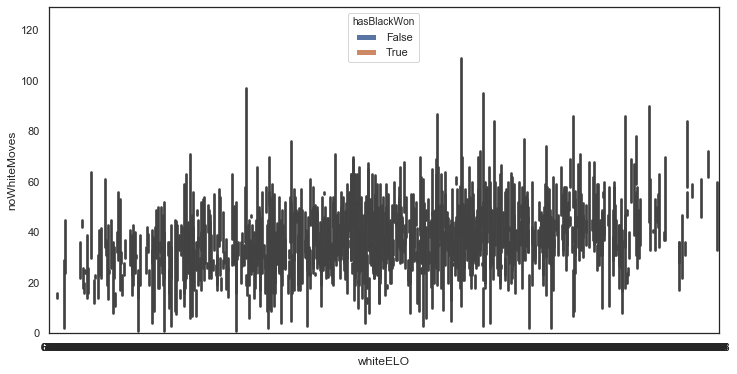

In [131]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    x="whiteELO", y="noWhiteMoves", 
    hue="hasBlackWon", lw=3, 
    data=data.query('termination == "Time forfeit"')
);

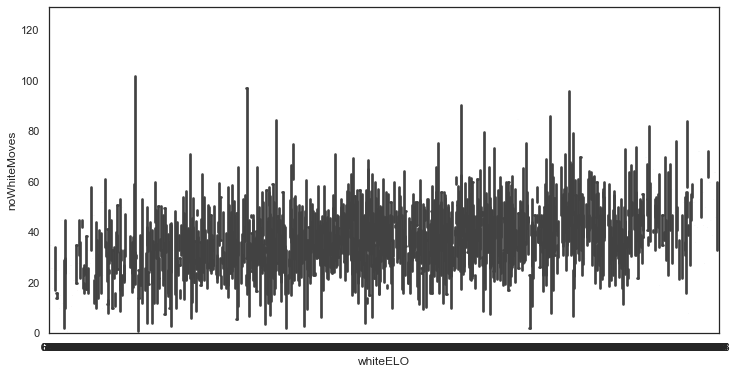

In [132]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    x="whiteELO", y="noWhiteMoves", 
    ci="sd", capsize=.2, palette="RdBu", saturation=.5,
    data=data.query('termination == "Time forfeit"')
);

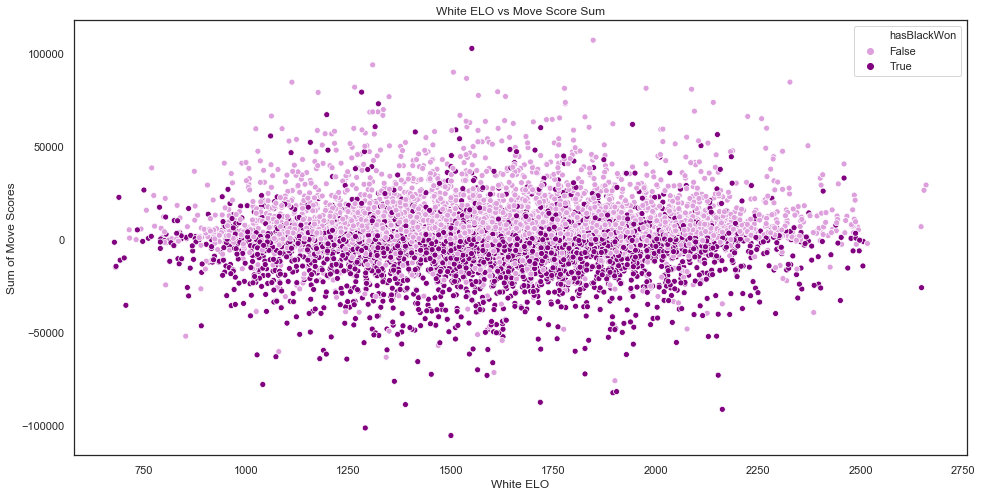

In [128]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(
    x="whiteELO", y="totalWhiteScore", 
    hue="hasBlackWon", lw=3, palette=['plum', 'purple'],
    data=data.query('isDraw == False')
);
plt.xlabel("White ELO")
plt.ylabel("Sum of Move Scores")
plt.title("White ELO vs Move Score Sum");

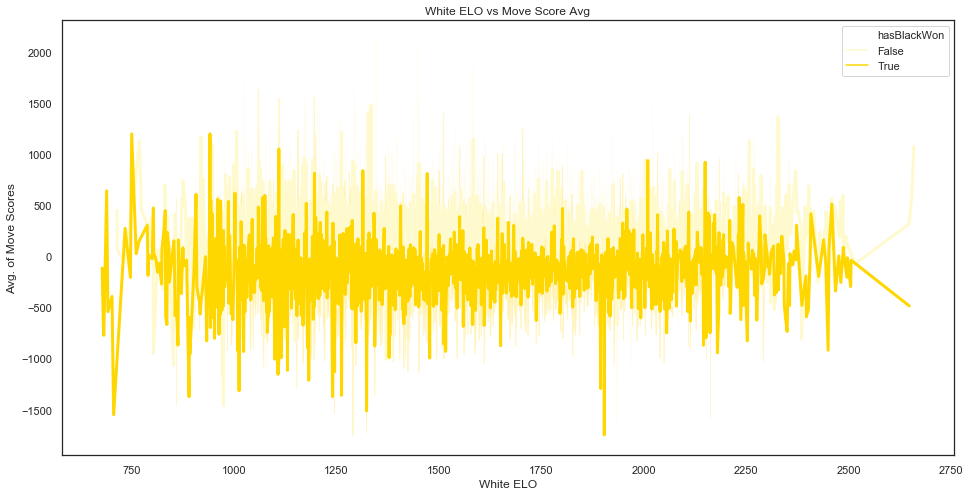

In [93]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    x="whiteELO", y="whiteAvgScore",     
    hue="hasBlackWon", lw=3, palette=['lemonchiffon', 'gold'],
    data=data
);
plt.xlabel("White ELO")
plt.ylabel("Avg. of Move Scores")
plt.title("White ELO vs Move Score Avg");

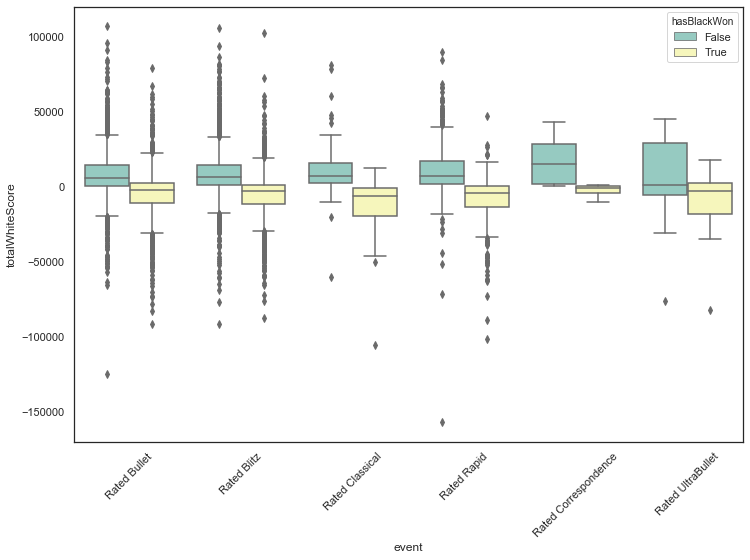

In [117]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='event', y='totalWhiteScore', hue='hasBlackWon', data=data, palette="Set3")
plt.xticks(rotation=45);

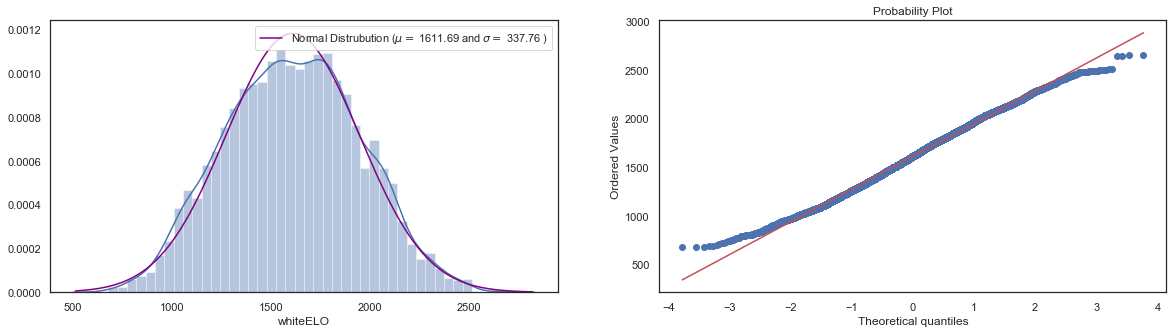

In [99]:
from scipy import stats
from scipy.stats import norm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

mu, sigma = norm.fit(data['whiteELO'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plot = sns.distplot(
    data['whiteELO'],
    fit=norm,
    ax=ax1,
    fit_kws={"color": "purple"},
)
plot.legend(
    ["Normal Distrubution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)]
)
# ax1.set_xlabel(xlabel)
# ax1.set_ylabel(ylabel)
# ax1.set_title(title)

stats.probplot(data['whiteELO'], plot=plt)
plt.show()

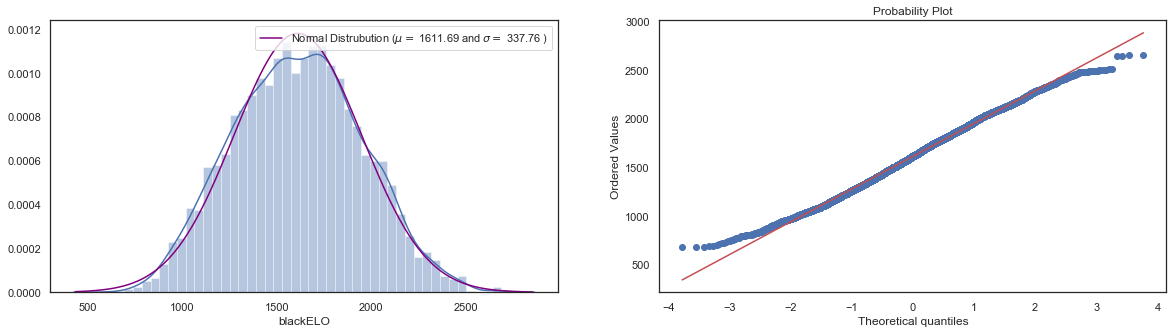

In [100]:
from scipy import stats
from scipy.stats import norm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

mu, sigma = norm.fit(data['whiteELO'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plot = sns.distplot(
    data['blackELO'],
    fit=norm,
    ax=ax1,
    fit_kws={"color": "purple"},
)
plot.legend(
    ["Normal Distrubution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)]
)
# ax1.set_xlabel(xlabel)
# ax1.set_ylabel(ylabel)
# ax1.set_title(title)

stats.probplot(data['whiteELO'], plot=plt)
plt.show()